In [1]:
import matplotlib.pyplot as plt
import numpy as np

import GWPhotonCounting

from jax.scipy.special import logsumexp

from scipy.interpolate import interp1d
from jax.lax import cumlogsumexp

/home/ethan.payne/code_libraries/bilby/bilby/gw/detector/geometry.py:5: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import ROT_DAY, DAYJUL_SI
/home/ethan.payne/.conda/envs/ve310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from copy import copy
params = {
   'axes.labelsize': 10,
   'font.size': 10,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'axes.titlesize':10,
   'text.usetex': True,
   'font.family':'serif',
   'font.serif':'Computer Modern'
   }
matplotlib.rcParams.update(params)
matplotlib.rcParams["font.serif"] = "Computer Modern Roman"
matplotlib.rcParams["font.family"] = "Serif"
matplotlib.rcParams['text.latex.preamble'] = r'\renewcommand{\mathdefault}[1][]{}'

from matplotlib.markers import MarkerStyle
import matplotlib as mpl

In [3]:
import glob, json
from tqdm import tqdm 

from scipy.signal import savgol_filter
sg_poly = 2
sg_nodes = 10


Nevents = 10000

loglikelihoods = []
loglikelihoods_no_background = []
loglikelihoods_0d1 = []
loglikelihoods_strain = []
loglikelihoods_strain_15db = []
loglikelihoods_strain_20db = []

signal_photons = []
noise_photons = []
noise_photons_0d01 = []
noise_photons_0d1 = []
snrs = []
snrs_fit_pc = []
snrs_silica = []
indices = []
log10A_fit_pc = []
log10A_fit_strain = []
log10A_fit_strain_15db = []

file_list = glob.glob("results_250623/result_CE_*.json") #250623 is the newer result
#file_list = glob.glob("results_250516/result_CE_*.json") 


R1d6s_interp = np.linspace(10,14,1000)
R1d6s = np.linspace(10,14,100)

for i in tqdm(range(len(file_list[:Nevents]))):
    file = file_list[i] #f'results_250410/result_CE1CE2silica_{10900 + i}.json'
    indices.append(int(file.split("_")[-1].split(".")[0]))
    with open(file, "r") as f:
        result = json.load(f)

    logls = interp1d(R1d6s, savgol_filter(result["logls"], sg_nodes, sg_poly), kind='cubic')(R1d6s_interp)
    logls_0d1 = interp1d(R1d6s, savgol_filter(result["logls_0d1"], sg_nodes, sg_poly), kind='cubic')(R1d6s_interp)
    logls_no_background = interp1d(R1d6s, savgol_filter(result["logls_no_background"], sg_nodes, sg_poly), kind='cubic')(R1d6s_interp)

    logls_strain = interp1d(R1d6s, savgol_filter(result["logls_strain"], sg_nodes, sg_poly), kind='cubic')(R1d6s_interp)
    logls_strain_15db = interp1d(R1d6s, savgol_filter(result["logls_strain_15db"], sg_nodes, sg_poly), kind='cubic')(R1d6s_interp)
    logls_strain_20db = interp1d(R1d6s, savgol_filter(result["logls_strain_20db"], sg_nodes, sg_poly), kind='cubic')(R1d6s_interp)
    

    # if np.max(logls) - np.min(logls) < 15:
    #     if np.max(logls_0d1) - np.min(logls_0d1) < 15:
    #         if np.max(logls_strain) - np.min(logls_strain) < 5:
    #             if np.max(logls_strain_15db) - np.min(logls_strain_15db) < 5:

    #if result["log10A_fit_pc"] < -21: #and result["log10A_fit_strain"] < -21 and result["log10A_fit_strain_15db"] < -21:
    if result['snr_sqz'] < 100:
        loglikelihoods.append(logls)
        loglikelihoods_0d1.append(logls_0d1)
        loglikelihoods_no_background.append(logls_no_background)

        loglikelihoods_strain.append(logls_strain)
        loglikelihoods_strain_15db.append(logls_strain_15db)
        loglikelihoods_strain_20db.append(logls_strain_20db)

        
        signal_photons.append(result["n_signal_photons"])
        noise_photons.append(result["n_noise_photons"])
        noise_photons_0d01.append(result["n_noise_photons_0d01"])
        noise_photons_0d1.append(result["n_noise_photons_0d1"])
        snrs.append(result["snr"])
        snrs_fit_pc.append(result["snr_fit_pc"])
        snrs_silica.append(result["snr_sqz"])

        #log10A_fit_pc.append(result["log10A_fit"])
        log10A_fit_pc.append(result["log10A_fit_pc"])
        #log10A_fit_strain.append(result["log10A_fit_strain"])
        #log10A_fit_strain_15db.append(result["log10A_fit_strain_15db"])

loglikelihoods = np.array(loglikelihoods)
loglikelihoods_0d1 = np.array(loglikelihoods_0d1)
loglikelihoods_no_background = np.array(loglikelihoods_no_background)
loglikelihoods_strain = np.array(loglikelihoods_strain)
loglikelihoods_strain_15db = np.array(loglikelihoods_strain_15db)
loglikelihoods_strain_20db = np.array(loglikelihoods_strain_20db)
signal_photons = np.array(signal_photons)
noise_photons = np.array(noise_photons)
noise_photons_0d01 = np.array(noise_photons_0d01)
noise_photons_0d1 = np.array(noise_photons_0d1)
snrs = np.array(snrs)
snrs_silica = np.array(snrs_silica)
snrs_fit_pc = np.array(snrs_fit_pc)

log10A_fit_pc = np.array(log10A_fit_pc)
log10A_fit_strain = np.array(log10A_fit_strain)
log10A_fit_strain_15db = np.array(log10A_fit_strain_15db)


  1%|          | 63/10000 [00:00<00:56, 174.72it/s]

100%|██████████| 10000/10000 [00:48<00:00, 205.78it/s]


In [4]:
Nevents = len(loglikelihoods)
print(Nevents)

10000


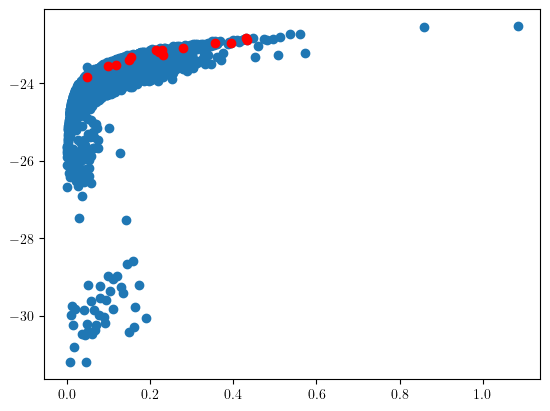

In [5]:
mask = signal_photons > 0
plt.scatter(snrs[mask], log10A_fit_pc[mask], color='red', zorder=100)

plt.scatter(snrs, log10A_fit_pc)

#plt.ylim(-10,0)

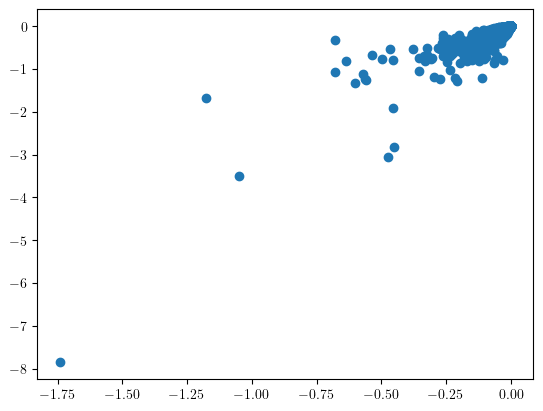

In [6]:
plt.scatter(np.min(loglikelihoods_strain.T-np.max(loglikelihoods_strain,axis=1),axis=0), np.min(loglikelihoods_strain_15db.T-np.max(loglikelihoods_strain_15db,axis=1),axis=0))

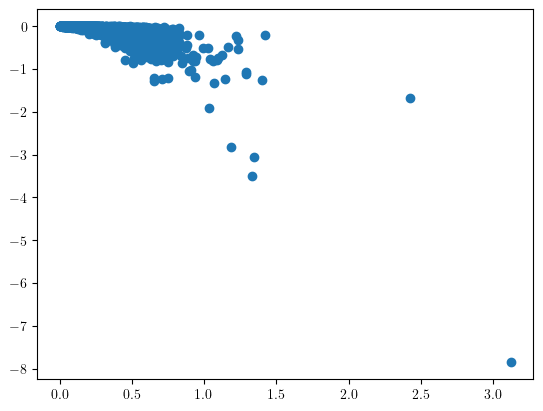

In [7]:
plt.scatter(snrs_silica, np.min(loglikelihoods_strain_15db.T-np.max(loglikelihoods_strain_15db,axis=1),axis=0))

In [8]:
np.sum(signal_photons), np.sum(noise_photons), np.sum(noise_photons_0d01), np.sum(noise_photons_0d1)

(14.0, 1145.0, 10.0, 93.0)

In [9]:
print(np.quantile(snrs_silica, [0.95]))

[0.47391217]


In [10]:
print(np.sqrt(np.sum(snrs**2)), np.sqrt(np.sum(snrs_silica**2)))
print(np.mean(snrs), np.mean(snrs_silica))
print(np.median(snrs), np.median(snrs_silica))


10.36665606567681 25.448950965910925
0.0848302510541173 0.20820105216000728
0.07172145751246262 0.17715161216443107


In [11]:


prob_pc = np.exp(np.sum(loglikelihoods, axis=0) - np.max(np.sum(loglikelihoods, axis=0)))
prob_pc /= np.sum(prob_pc)*(R1d6s[1]-R1d6s[0])

prob_pc_0d1 = np.exp(np.sum(loglikelihoods_0d1, axis=0) - np.max(np.sum(loglikelihoods_0d1, axis=0)))
prob_pc_0d1 /= np.sum(prob_pc_0d1)*(R1d6s[1]-R1d6s[0])

prob_pc_no_background = np.exp(np.sum(loglikelihoods_no_background, axis=0) - np.max(np.sum(loglikelihoods_no_background, axis=0)))
prob_pc_no_background /= np.sum(prob_pc_no_background)*(R1d6s[1]-R1d6s[0])

log_prob_strain = np.sum(loglikelihoods_strain, axis=0) - np.max(np.sum(loglikelihoods_strain, axis=0))
prob_strain = np.exp(log_prob_strain)
prob_strain /= np.sum(prob_strain)*(R1d6s[1]-R1d6s[0])

log_prob_strain_15db = np.sum(loglikelihoods_strain_15db, axis=0) - np.max(np.sum(loglikelihoods_strain_15db, axis=0))
prob_strain_15db = np.exp(log_prob_strain_15db)
prob_strain_15db /= np.sum(prob_strain_15db)*(R1d6s[1]-R1d6s[0])

log_prob_strain_20db = np.sum(loglikelihoods_strain_20db, axis=0) - np.max(np.sum(loglikelihoods_strain_20db, axis=0))
prob_strain_20db = np.exp(log_prob_strain_20db)
prob_strain_20db /= np.sum(prob_strain_20db)*(R1d6s[1]-R1d6s[0])


In [12]:
dataset = np.genfromtxt(f'/home/ethan.payne/projects/GWPhotonCounting/projects/PM_EOS/hierarchical_EOS/bns_pm_dataset_MLE_250609.dat') #bns_pm_dataset_MLE_250509
mtots, z, phi, psi, ra, dec, iota, f0_fit, gamma_fit, A_fit, phase_fit, snr, snr_sqz = dataset.T

In [13]:
minimization = []

for R1d6 in R1d6s_interp:
    minimization.append(np.sum(-(f0_fit - GWPhotonCounting.hierarchical.frequency_model(mtots, R1d6)/(1+z))**2))

print(R1d6s_interp[np.argmax(minimization)], np.max(minimization))

11.073073073073074 -4825800.044006405


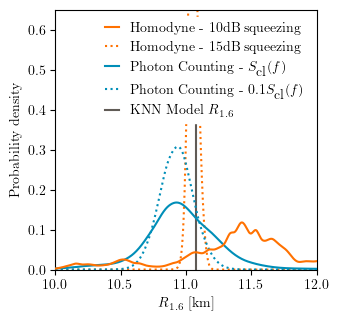

In [15]:
fig = plt.figure(figsize=(3.375,3.375))

from scipy.interpolate import interp1d

Rs = np.linspace(10,14,1000)

ymax = 0.65

plt.plot(Rs, interp1d(R1d6s_interp, prob_strain, kind='linear')(Rs), color='#ff7100ff', label='Homodyne - 10dB squeezing', zorder=100)
plt.plot(Rs, interp1d(R1d6s_interp, prob_strain_15db, kind='linear')(Rs), color='#ff7100ff', label='Homodyne - 15dB squeezing', ls=':')
plt.plot(Rs, interp1d(R1d6s_interp, prob_pc, kind='linear')(Rs), color='#008eb8ff', label=r'Photon Counting - $S_\textrm{cl}(f)$', zorder=99)
plt.plot(Rs, interp1d(R1d6s_interp, prob_pc_0d1, kind='linear')(Rs), color='#008eb8ff', label=r'Photon Counting - $0.1S_\textrm{cl}(f)$', ls=':')

plt.plot([11.073, 11.073], [0, 0.9*ymax], color='#605B56', zorder=-10, label=r'KNN Model $R_{1.6}$')

#plt.xlim(9.5,13.5)
plt.ylabel(r'Probability density')
plt.xlabel(r'$R_{1.6}$ [km]')


legend = plt.legend(loc='upper right', frameon=True, handlelength=1, framealpha=1, edgecolor='white')

#plt.ylim(0,0.63)
plt.ylim(0,ymax)
plt.xlim(10,12)

plt.savefig("hierarchical.pdf", bbox_inches='tight')
#plt.savefig("hierarchical.png", bbox_inches='tight', dpi=300)

In [16]:
logl_pc = np.cumsum(loglikelihoods,axis=0)
logl_pc -= logsumexp(logl_pc, axis=1)[:,None]
logl_pc_cumul = cumlogsumexp(logl_pc, axis=1)
logl_pc_cumul -= np.max(logl_pc_cumul, axis=1)[:, None]

logl_pc_0d1 = np.cumsum(loglikelihoods_0d1,axis=0)
logl_pc_0d1 -= logsumexp(logl_pc_0d1, axis=1)[:,None]
logl_pc_0d1_cumul = cumlogsumexp(logl_pc_0d1, axis=1)
logl_pc_0d1_cumul -= np.max(logl_pc_0d1_cumul, axis=1)[:, None]

logl_pc_no_background = np.cumsum(loglikelihoods_no_background,axis=0)
logl_pc_no_background -= logsumexp(logl_pc_no_background, axis=1)[:,None]
logl_pc_no_background_cumul = cumlogsumexp(logl_pc_no_background, axis=1)
logl_pc_no_background_cumul -= np.max(logl_pc_no_background_cumul, axis=1)[:, None]

logl_strain = np.cumsum(loglikelihoods_strain,axis=0)
logl_strain -= logsumexp(logl_strain, axis=1)[:,None]
logl_strain_cumul = cumlogsumexp(logl_strain, axis=1)
logl_strain_cumul -= np.max(logl_strain_cumul, axis=1)[:,None]

logl_strain_15db = np.cumsum(loglikelihoods_strain_15db,axis=0)
logl_strain_15db -= logsumexp(logl_strain_15db, axis=1)[:,None]
logl_strain_15db_cumul = cumlogsumexp(logl_strain_15db, axis=1)
logl_strain_15db_cumul -= np.max(logl_strain_15db_cumul, axis=1)[:,None]

logl_strain_20db = np.cumsum(loglikelihoods_strain_20db,axis=0)
logl_strain_20db -= logsumexp(logl_strain_20db, axis=1)[:,None]
logl_strain_20db_cumul = cumlogsumexp(logl_strain_20db, axis=1)
logl_strain_20db_cumul -= np.max(logl_strain_20db_cumul, axis=1)[:,None]

pc_r1d6_widths = []
pc_r1d6_widths_0d1 = []
pc_r1d6_widths_strain = []
pc_r1d6_widths_strain_15db = []
pc_r1d6_widths_strain_20db = []
pc_r1d6_widths_no_background = []

interval = np.array([0.25,0.75])

for i in tqdm(range(Nevents)):
    bounds = interp1d(np.exp(logl_pc_cumul[i]), R1d6s_interp, kind='linear', fill_value=(0,1), bounds_error=False)(interval)
    width_pc = np.diff(bounds)[0]
    pc_r1d6_widths.append(width_pc)

    bounds = interp1d(np.exp(logl_pc_0d1_cumul[i]), R1d6s_interp, kind='linear', fill_value=(0,1), bounds_error=False)(interval)
    width_pc = np.diff(bounds)[0]
    pc_r1d6_widths_0d1.append(width_pc)

    bounds = interp1d(np.exp(logl_pc_no_background_cumul[i]), R1d6s_interp, kind='linear', fill_value=(0,1), bounds_error=False)(interval)
    width_pc = np.diff(bounds)[0]
    pc_r1d6_widths_no_background.append(width_pc)

    bounds = interp1d(np.exp(logl_strain_cumul[i]), R1d6s_interp, kind='linear', fill_value=(0,1), bounds_error=False)(interval)
    width_pc = np.diff(bounds)[0]
    pc_r1d6_widths_strain.append(width_pc)

    bounds = interp1d(np.exp(logl_strain_15db_cumul[i]), R1d6s_interp, kind='linear', fill_value=(0,1), bounds_error=False)(interval)
    width_pc = np.diff(bounds)[0]
    pc_r1d6_widths_strain_15db.append(width_pc)

    bounds = interp1d(np.exp(logl_strain_20db_cumul[i]), R1d6s_interp, kind='linear', fill_value=(0,1), bounds_error=False)(interval)
    width_pc = np.diff(bounds)[0]
    pc_r1d6_widths_strain_20db.append(width_pc)


100%|██████████| 10000/10000 [00:12<00:00, 786.82it/s]


(0.0, 10000.0)

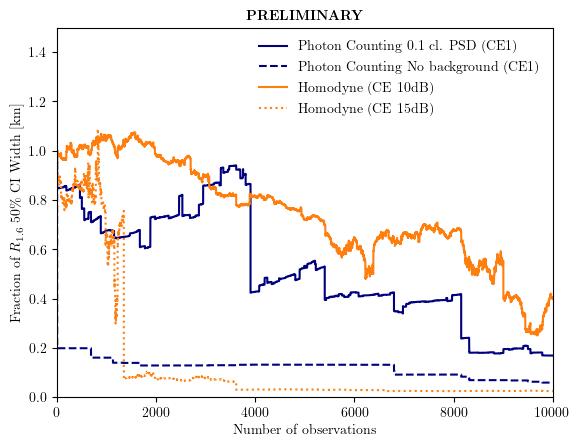

In [17]:
plt.step(np.linspace(0,Nevents,Nevents, dtype=int), np.array(pc_r1d6_widths)/(0.50 * 4), color="navy", label='Photon Counting 0.1 cl. PSD (CE1)')
plt.step(np.linspace(0,Nevents,Nevents, dtype=int), np.array(pc_r1d6_widths_no_background)/(0.50 * 4), color="navy", ls='--', label='Photon Counting No background (CE1)')
plt.step(np.linspace(0,Nevents,Nevents, dtype=int), np.array(pc_r1d6_widths_strain)/(0.50 * 4), color="C1", label='Homodyne (CE 10dB)')
plt.step(np.linspace(0,Nevents,Nevents, dtype=int), np.array(pc_r1d6_widths_strain_15db)/(0.50 * 4), color="C1", ls=':', label='Homodyne (CE 15dB)')

plt.ylabel(r'Fraction of $R_{1.6}$ 50\% CI Width [km]')
plt.xlabel(r'Number of observations')

#plt.plot(np.linspace(0,Nevents,Nevents, dtype=int), 2/np.sqrt(np.linspace(0,Nevents,Nevents, dtype=int)), color='k', ls='--', label=r'$\propto 1/\sqrt{N}$')
plt.legend(loc='upper right', fontsize=10, frameon=False)
plt.title(r'\textbf{PRELIMINARY}')

plt.ylim(0,1.5)
plt.xlim(0,Nevents)

In [18]:
### Ordering events by the snrs

sorted_indices = np.argsort(snrs)[::-1]
sorted_snrs = snrs[sorted_indices]
sorted_indices_silica = np.argsort(snrs_silica)[::-1]
sorted_snrs_silica = snrs_silica[sorted_indices_silica]

logl_pc = np.cumsum(loglikelihoods[sorted_indices],axis=0)
logl_pc -= logsumexp(logl_pc, axis=1)[:,None]
logl_pc_cumul = cumlogsumexp(logl_pc, axis=1)
logl_pc_cumul -= np.max(logl_pc_cumul, axis=1)[:, None]

logl_pc_0d1 = np.cumsum(loglikelihoods_0d1[sorted_indices],axis=0)
logl_pc_0d1 -= logsumexp(logl_pc_0d1, axis=1)[:,None]
logl_pc_0d1_cumul = cumlogsumexp(logl_pc_0d1, axis=1)
logl_pc_0d1_cumul -= np.max(logl_pc_0d1_cumul, axis=1)[:, None]

logl_pc_no_background = np.cumsum(loglikelihoods_no_background[sorted_indices],axis=0)
logl_pc_no_background -= logsumexp(logl_pc_no_background, axis=1)[:,None]
logl_pc_no_background_cumul = cumlogsumexp(logl_pc_no_background, axis=1)
logl_pc_no_background_cumul -= np.max(logl_pc_no_background_cumul, axis=1)[:, None]

logl_strain = np.cumsum(loglikelihoods_strain[sorted_indices],axis=0)
logl_strain -= logsumexp(logl_strain, axis=1)[:,None]
logl_strain_cumul = cumlogsumexp(logl_strain, axis=1)
logl_strain_cumul -= np.max(logl_strain_cumul, axis=1)[:,None]

logl_strain_15db = np.cumsum(loglikelihoods_strain_15db[sorted_indices],axis=0)
logl_strain_15db -= logsumexp(logl_strain_15db, axis=1)[:,None]
logl_strain_15db_cumul = cumlogsumexp(logl_strain_15db, axis=1)
logl_strain_15db_cumul -= np.max(logl_strain_15db_cumul, axis=1)[:,None]

logl_strain_20db = np.cumsum(loglikelihoods_strain_20db[sorted_indices],axis=0)
logl_strain_20db -= logsumexp(logl_strain_20db, axis=1)[:,None]
logl_strain_20db_cumul = cumlogsumexp(logl_strain_20db, axis=1)
logl_strain_20db_cumul -= np.max(logl_strain_20db_cumul, axis=1)[:,None]

pc_r1d6_widths = []
pc_r1d6_widths_0d1 = []
pc_r1d6_widths_strain = []
pc_r1d6_widths_strain_15db = []
pc_r1d6_widths_strain_20db = []
pc_r1d6_widths_no_background = []

interval = np.array([0.16,0.84])

for i in tqdm(range(Nevents)):

    bounds = interp1d(np.exp(logl_pc_cumul[i]), R1d6s_interp, kind='linear', fill_value=(0,1), bounds_error=False)(interval)
    width_pc = np.diff(bounds)[0]
    pc_r1d6_widths.append(width_pc)

    bounds = interp1d(np.exp(logl_pc_0d1_cumul[i]), R1d6s_interp, kind='linear', fill_value=(0,1), bounds_error=False)(interval)
    width_pc = np.diff(bounds)[0]
    pc_r1d6_widths_0d1.append(width_pc)

    bounds = interp1d(np.exp(logl_pc_no_background_cumul[i]), R1d6s_interp, kind='linear', fill_value=(0,1), bounds_error=False)(interval)
    width_pc = np.diff(bounds)[0]
    pc_r1d6_widths_no_background.append(width_pc)

    bounds = interp1d(np.exp(logl_strain_cumul[i]), R1d6s_interp, kind='linear', fill_value=(0,1), bounds_error=False)(interval)
    width_pc = np.diff(bounds)[0]
    pc_r1d6_widths_strain.append(width_pc)

    bounds = interp1d(np.exp(logl_strain_15db_cumul[i]), R1d6s_interp, kind='linear', fill_value=(0,1), bounds_error=False)(interval)
    width_pc = np.diff(bounds)[0]
    pc_r1d6_widths_strain_15db.append(width_pc)

    bounds = interp1d(np.exp(logl_strain_20db_cumul[i]), R1d6s_interp, kind='linear', fill_value=(0,1), bounds_error=False)(interval)
    width_pc = np.diff(bounds)[0]
    pc_r1d6_widths_strain_20db.append(width_pc)

100%|██████████| 10000/10000 [00:12<00:00, 770.92it/s]


Text(0.5, 0, 'Homodyne SNR (10db sqz)')

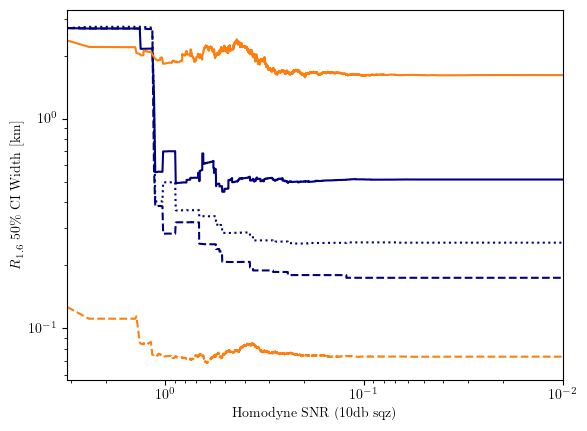

In [19]:
plt.plot(sorted_snrs_silica, np.array(pc_r1d6_widths), color="navy", label='Photon Counting 1cl PSD')
plt.plot(sorted_snrs_silica, np.array(pc_r1d6_widths_0d1), color="navy", ls=':', label='Photon Counting 0.1 cl. PSD')
plt.plot(sorted_snrs_silica, np.array(pc_r1d6_widths_no_background), color="navy", ls='--', label='Photon Counting No background')
plt.plot(sorted_snrs_silica, np.array(pc_r1d6_widths_strain), color="C1", label='Homodyne 10dB squeezing')
plt.plot(sorted_snrs_silica, np.array(pc_r1d6_widths_strain_15db), color="C1", ls='--', label='Homodyne 15dB squeezing')
plt.xscale('log')
plt.yscale('log')
plt.xlim(np.max(sorted_snrs_silica), 1e-2)

plt.ylabel(r'$R_{1.6}$ 50\% CI Width [km]')
plt.xlabel(r'Homodyne SNR (10db sqz)')

In [20]:
inv_snr_cdf = interp1d(np.linspace(0,Nevents-1,Nevents), (sorted_snrs_silica), kind='linear', fill_value=((np.max(sorted_snrs_silica)), (np.min(sorted_snrs_silica))), bounds_error=False)

snr_cdf = interp1d((sorted_snrs_silica), np.linspace(0,Nevents-1,Nevents), kind='linear', fill_value=(0,Nevents), bounds_error=False)

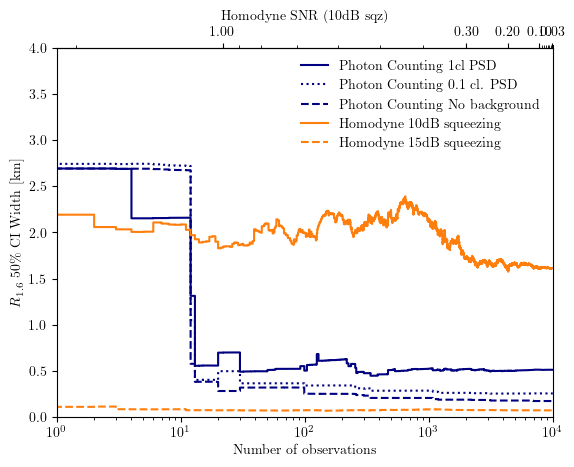

In [21]:
from matplotlib.ticker import LogLocator, LogFormatterMathtext

plt.step(np.linspace(0,Nevents-1,Nevents), np.array(pc_r1d6_widths), color="navy", label='Photon Counting 1cl PSD')
plt.step(np.linspace(0,Nevents-1,Nevents), np.array(pc_r1d6_widths_0d1), color="navy", ls=':', label='Photon Counting 0.1 cl. PSD')
plt.step(np.linspace(0,Nevents-1,Nevents), np.array(pc_r1d6_widths_no_background), color="navy", ls='--', label='Photon Counting No background')
plt.step(np.linspace(0,Nevents-1,Nevents), np.array(pc_r1d6_widths_strain), color="C1", label='Homodyne 10dB squeezing')
plt.step(np.linspace(0,Nevents-1,Nevents), np.array(pc_r1d6_widths_strain_15db), color="C1", ls='--', label='Homodyne 15dB squeezing')
plt.xlim(1,Nevents)

ax = plt.gca()
ax.set_ylim(0,4)
#ax.set_xlim(1,10000)
ax.set_xscale('log')
#ax.set_yscale('log')

secax = ax.secondary_xaxis('top', functions=(inv_snr_cdf, snr_cdf))
secax.set_xlabel('Homodyne SNR (10dB sqz)')
#secax.set_xscale('log')
#secax.invert_xaxis()
#secax.set_xscale('log')

# # plot like this if linear in N
secax.set_xticks([1, 0.3, 0.2, 0.1, 0.03])
secax.set_xticklabels([1.0, r'$3\times10^{-1}$', r'$2\times10^{-1}$', r'$10^{-1}$', r'$3\times 10^{-2}$'])
secax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# # plot like this if log in N
#secax.set_xticks([1, 0.3, 0.1])
#secax.set_xticklabels([1.0, 0.3, 0.1])


plt.ylabel(r'$R_{1.6}$ 50\% CI Width [km]')
plt.xlabel(r'Number of observations')
plt.legend(loc='upper right', frameon=False)

In [22]:
CI_array_val_pc = np.zeros((Nevents, 1000))
CI_array_val_pc_0d1 = np.zeros((Nevents, 1000))
CI_array_val_pc_no_background = np.zeros((Nevents, 1000))
CI_array_val_strain = np.zeros((Nevents, 1000))
CI_array_val_strain_15db = np.zeros((Nevents, 1000))
CI_array_val_strain_20db = np.zeros((Nevents, 1000))

prob_pc = np.exp(logl_pc - np.max(logl_pc,axis=1)[:,None])/np.sum(np.exp(logl_pc- np.max(logl_pc,axis=1)[:,None]),axis=1)[:,None]
prob_pc_0d1 = np.exp(logl_pc_0d1 - np.max(logl_pc_0d1,axis=1)[:,None])/np.sum(np.exp(logl_pc_0d1- np.max(logl_pc_0d1,axis=1)[:,None]),axis=1)[:,None]
prob_pc_no_background = np.exp(logl_pc_no_background - np.max(logl_pc_no_background,axis=1)[:,None])/np.sum(np.exp(logl_pc_no_background- np.max(logl_pc_no_background,axis=1)[:,None]),axis=1)[:,None]
prob_strain = np.exp(logl_strain - np.max(logl_strain,axis=1)[:,None])/np.sum(np.exp(logl_strain- np.max(logl_strain,axis=1)[:,None]),axis=1)[:,None]
prob_strain_15db = np.exp(logl_strain_15db - np.max(logl_strain_15db,axis=1)[:,None])/np.sum(np.exp(logl_strain_15db- np.max(logl_strain_15db,axis=1)[:,None]),axis=1)[:,None]
prob_strain_20db = np.exp(logl_strain_20db - np.max(logl_strain_20db,axis=1)[:,None])/np.sum(np.exp(logl_strain_20db- np.max(logl_strain_20db,axis=1)[:,None]),axis=1)[:,None]

for i in tqdm(range(Nevents)):
    prob_interp = prob_pc[i]
    prob_pc_sorted_indexes = np.argsort(prob_interp)[::-1]
    prob_pc_sorted = prob_interp[prob_pc_sorted_indexes]
    CI_array_val_pc[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.9]] = 0.5
    CI_array_val_pc[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.68]] = 1

    prob_interp = prob_pc_0d1[i]
    prob_pc_sorted_indexes = np.argsort(prob_interp)[::-1]
    prob_pc_sorted = prob_interp[prob_pc_sorted_indexes]
    CI_array_val_pc_0d1[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.9]] = 0.5
    CI_array_val_pc_0d1[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.68]] = 1

    prob_interp = prob_pc_no_background[i]
    prob_pc_sorted_indexes = np.argsort(prob_interp)[::-1]
    prob_pc_sorted = prob_interp[prob_pc_sorted_indexes]
    CI_array_val_pc_no_background[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.9]] = 0.5
    CI_array_val_pc_no_background[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.68]] = 1

    prob_interp = prob_strain[i]
    prob_pc_sorted_indexes = np.argsort(prob_interp)[::-1]
    prob_pc_sorted = prob_interp[prob_pc_sorted_indexes]
    CI_array_val_strain[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.9]] = 0.5
    CI_array_val_strain[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.68]] = 1

    prob_interp = prob_strain_15db[i]
    prob_pc_sorted_indexes = np.argsort(prob_interp)[::-1]
    prob_pc_sorted = prob_interp[prob_pc_sorted_indexes]
    CI_array_val_strain_15db[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.9]] = 0.5
    CI_array_val_strain_15db[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.68]] = 1

    prob_interp = prob_strain_20db[i]
    prob_pc_sorted_indexes = np.argsort(prob_interp)[::-1]
    prob_pc_sorted = prob_interp[prob_pc_sorted_indexes]
    CI_array_val_strain_20db[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.9]] = 0.5
    CI_array_val_strain_20db[i, prob_pc_sorted_indexes[np.cumsum(prob_pc_sorted/(np.sum(prob_pc_sorted))) < 0.68]] = 1

100%|██████████| 10000/10000 [00:03<00:00, 2646.83it/s]


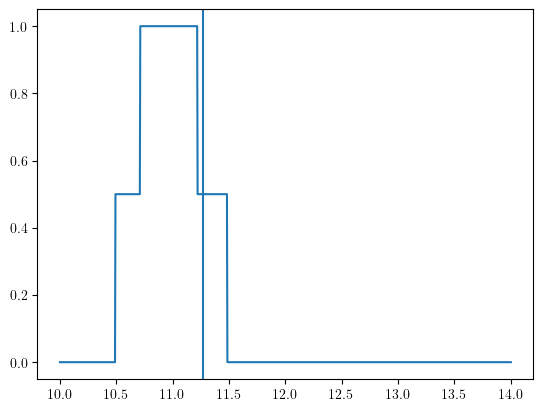

In [23]:
plt.plot(R1d6s_interp, CI_array_val_pc[-1])
plt.axvline(11.27)

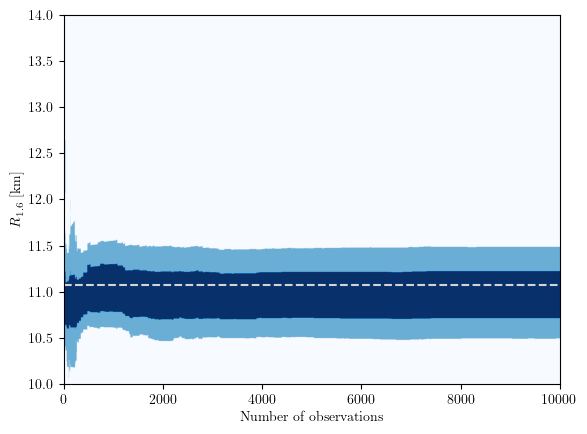

In [24]:
plt.imshow(CI_array_val_pc.T, aspect='auto', extent=(0, Nevents, 10, 14), origin='lower', cmap='Blues', vmin=0, vmax=1)
plt.xlabel('Number of observations')
plt.ylabel(r'$R_{1.6}$ [km]')
plt.axhline(11.07, color='lightgrey', label=r'APR4 $R_{1.6}$', linestyle='--')

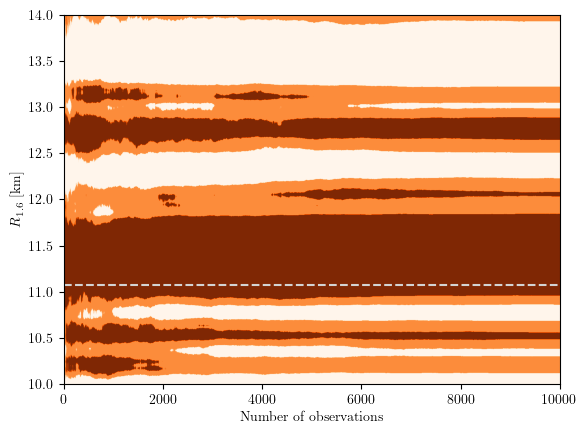

In [25]:
plt.imshow(CI_array_val_strain.T, aspect='auto', extent=(0, Nevents, 10, 14), origin='lower', cmap='Oranges', vmin=0, vmax=1)
plt.xlabel('Number of observations')
plt.ylabel(r'$R_{1.6}$ [km]')
plt.axhline(11.07, color='lightgrey', label=r'APR4 $R_{1.6}$', linestyle='--')

In [26]:
CI_array_val_pc[CI_array_val_pc < 1] = 0
CI_array_val_pc_sum = np.sum(CI_array_val_pc, axis=1) * (R1d6s_interp[1]-R1d6s_interp[0])
CI_array_val_pc_0d1[CI_array_val_pc_0d1 < 1] = 0
CI_array_val_pc_0d1_sum = np.sum(CI_array_val_pc_0d1, axis=1) * (R1d6s_interp[1]-R1d6s_interp[0])
CI_array_val_pc_no_background[CI_array_val_pc_no_background < 1] = 0
CI_array_val_pc_no_background_sum = np.sum(CI_array_val_pc_no_background, axis=1) * (R1d6s_interp[1]-R1d6s_interp[0])

CI_array_val_strain[CI_array_val_strain < 1] = 0
CI_array_val_strain_sum = np.sum(CI_array_val_strain, axis=1) * (R1d6s_interp[1]-R1d6s_interp[0])
CI_array_val_strain_15db[CI_array_val_strain_15db < 1] = 0
CI_array_val_strain_15db_sum = np.sum(CI_array_val_strain_15db, axis=1) * (R1d6s_interp[1]-R1d6s_interp[0])
CI_array_val_strain_20db[CI_array_val_strain_20db < 1] = 0
CI_array_val_strain_20db_sum = np.sum(CI_array_val_strain_20db, axis=1) * (R1d6s_interp[1]-R1d6s_interp[0])

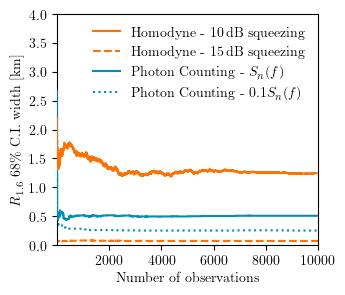

In [27]:
fig = plt.figure(figsize=(3.375,3))

plt.step(np.linspace(0,Nevents-1,Nevents, dtype=int), CI_array_val_strain_sum, color="#ff7100ff", label=r'Homodyne - 10\,dB squeezing', zorder=100)
plt.step(np.linspace(0,Nevents-1,Nevents, dtype=int), CI_array_val_strain_15db_sum, color="#ff7100ff", ls='--', label=r'Homodyne - 15\,dB squeezing')

plt.step(np.linspace(0,Nevents-1,Nevents, dtype=int), CI_array_val_pc_sum, color='#008eb8ff', label=r'Photon Counting - $S_n(f)$', zorder=99)
plt.step(np.linspace(0,Nevents-1,Nevents, dtype=int), CI_array_val_pc_0d1_sum, color='#008eb8ff', ls=':', label=r'Photon Counting - $0.1S_n(f)$')

plt.ylabel(r'$R_{1.6}$ 68\% C.I. width [km]')
plt.xlabel(r'Number of observations')
plt.xlim(1,Nevents)
plt.ylim(0,4)

#plt.xscale('log')

# for i in range(Nevents):
#     if signal_photons[sorted_indices_silica][i] > 0:
#         plt.axvline(x=i, color='#605B56',zorder=-10)

#plt.plot(np.linspace(0,Nevents-1,Nevents, dtype=int), CI_array_val_pc_no_background_sum[-1]*np.sqrt(np.sum(sorted_snrs_silica**2))/np.sqrt(np.cumsum(sorted_snrs_silica**2)), color='k', ls='--', label=r'$\propto 1/\sqrt{\sum\rho^2}$')
#plt.plot(np.linspace(0,Nevents-1,Nevents, dtype=int), CI_array_val_pc_sum[-1]*np.sqrt(np.sum(sorted_snrs_silica**2))/np.sqrt(np.cumsum(sorted_snrs_silica**2)), color='k', ls='--')

plt.legend(loc='upper right', frameon=False)
#plt.xscale('log')

plt.savefig("hierarchical_ci.pdf", bbox_inches='tight')

/local/ethan.payne/ipykernel_1888725/1149938533.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,3)


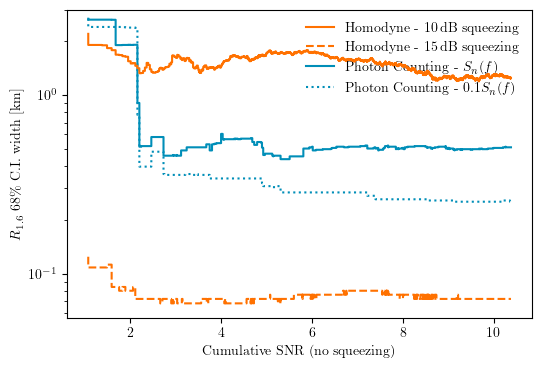

In [28]:
fig = plt.figure(figsize=(6,4))

plt.step(np.cumsum(sorted_snrs**2)**0.5, CI_array_val_strain_sum, color="#ff7100ff", label=r'Homodyne - 10\,dB squeezing', zorder=100)
plt.step(np.cumsum(sorted_snrs**2)**0.5, CI_array_val_strain_15db_sum, color="#ff7100ff", ls='--', label=r'Homodyne - 15\,dB squeezing')

plt.step(np.cumsum(sorted_snrs**2)**0.5, CI_array_val_pc_sum, color='#008eb8ff', label=r'Photon Counting - $S_n(f)$', zorder=99)
plt.step(np.cumsum(sorted_snrs**2)**0.5, CI_array_val_pc_0d1_sum, color='#008eb8ff', ls=':', label=r'Photon Counting - $0.1S_n(f)$')

plt.ylabel(r'$R_{1.6}$ 68\% C.I. width [km]')
plt.xlabel(r'Cumulative SNR (no squeezing)')
#plt.xscale('log')
plt.yscale('log')
#plt.xlim(1,Nevents)
plt.ylim(0,3)


# for i in range(Nevents):
#     if signal_photons[sorted_indices_silica][i] > 0:
#         plt.axvline(x=i, color='#605B56',zorder=-10)

#plt.plot(np.linspace(0,Nevents-1,Nevents, dtype=int), CI_array_val_pc_no_background_sum[-1]*np.sqrt(np.sum(sorted_snrs_silica**2))/np.sqrt(np.cumsum(sorted_snrs_silica**2)), color='k', ls='--', label=r'$\propto 1/\sqrt{\sum\rho^2}$')
#plt.plot(np.linspace(0,Nevents-1,Nevents, dtype=int), CI_array_val_pc_sum[-1]*np.sqrt(np.sum(sorted_snrs_silica**2))/np.sqrt(np.cumsum(sorted_snrs_silica**2)), color='k', ls='--')

plt.legend(loc='upper right', frameon=False)
#plt.yscale('log')

plt.savefig("hierarchical_snr_ci.pdf", bbox_inches='tight')

In [29]:
CI_array_val_pc_sum[-1]

0.5085085085085534

In [32]:
CI_array_val_strain_sum[-1]

1.2452452452453553

In [31]:
from astropy.cosmology import Planck18
from astropy import units as u

zmax = 10
zinterp = np.expm1(np.linspace(np.log1p(0), np.log1p(zmax), 2000))
dVdzdt_interp = 4*np.pi*Planck18.differential_comoving_volume(zinterp).to(u.Gpc**3/u.sr).value/(1+zinterp)

pdf_red = ((1+zinterp)**2.7)/(1+((1+zinterp)/2.9)**5.6) * dVdzdt_interp

In [32]:
integrated_pdf = np.sum(pdf_red) * (zinterp[1] - zinterp[0])

print(integrated_pdf)

1340.3179675286349


In [33]:
1e4/integrated_pdf/np.array([10,1700])

array([0.74609162, 0.00438877])

In [34]:
1e4/integrated_pdf/np.array([0.8,440])

array([9.32614522, 0.01695663])

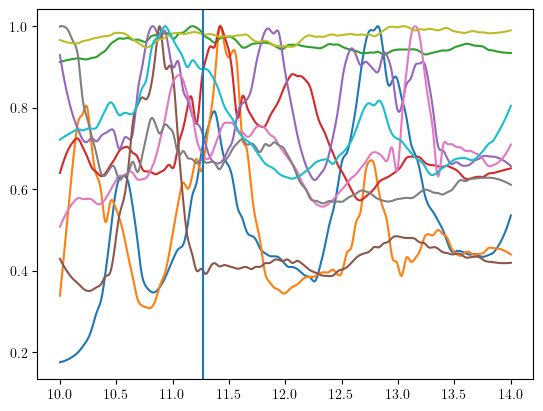

In [35]:
plt.plot(R1d6s_interp, np.exp(loglikelihoods_strain[sorted_indices_silica][:10].T - np.max(loglikelihoods_strain[sorted_indices_silica][:10], axis=1)), label='Homodyne 10dB')
plt.axvline(11.27)
#plt.ylim(-0.2,0)
#plt.ylim(0,)

In [36]:
file_list[sorted_indices_silica[0]]

'results_250623/result_CE_8215.json'

In [37]:
attempt1 = np.sum((loglikelihoods[sorted_indices_silica][0:1000]-np.max(loglikelihoods[sorted_indices_silica][0:1000])),axis=0)

In [38]:

# for idx in range(60,80):
#     plt.plot(R1d6s_interp, np.exp(loglikelihoods_strain[sorted_indices_silica][idx]-np.max(loglikelihoods_strain[sorted_indices_silica][idx])))
# plt.ylim(0)

(0.0, 1.0498342390127962)

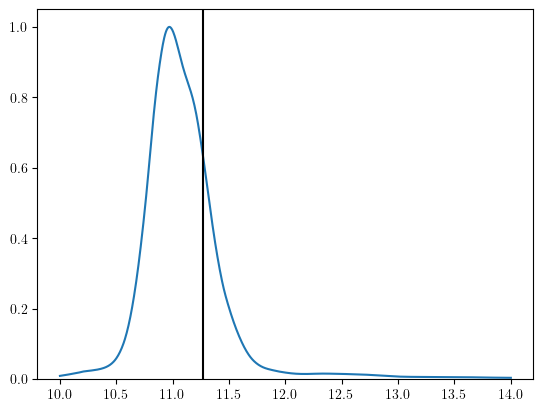

In [39]:
plt.plot(R1d6s_interp, np.exp(attempt1 - np.max(attempt1)))
plt.axvline(11.27, color='k')
plt.ylim(0,)

In [40]:
sorted_indices_silica[:10]

array([3619, 3074, 8181, 2700, 1353,  299, 9684, 5414, 8884, 3907])

In [41]:
snrs_silica[234]

0.20722449709168153

In [60]:
file_list[:Nevents][sorted_indices_silica[234]]

IndexError: index 234 is out of bounds for axis 0 with size 227

In [61]:
sorted_snrs_silica

array([0.78987724, 0.73763664, 0.61518613, 0.59236369, 0.5530445 ,
       0.54510378, 0.5399625 , 0.52745013, 0.52385809, 0.50624157,
       0.50470588, 0.49699775, 0.46650583, 0.43864137, 0.43562735,
       0.41659703, 0.40829585, 0.40549147, 0.39404213, 0.39098081,
       0.38927994, 0.38062897, 0.37208712, 0.36491696, 0.35752167,
       0.35314291, 0.35105026, 0.34790702, 0.34754465, 0.34733209,
       0.34610792, 0.3459465 , 0.34554358, 0.33778712, 0.3342734 ,
       0.33087183, 0.32890896, 0.32636285, 0.31368122, 0.31218747,
       0.30784431, 0.30777852, 0.3077698 , 0.29782093, 0.29742307,
       0.29183526, 0.29004083, 0.28851351, 0.27918706, 0.27888905,
       0.27645042, 0.2692417 , 0.26729979, 0.26090671, 0.26000996,
       0.25246115, 0.25151852, 0.25076672, 0.25007273, 0.24915222,
       0.24544393, 0.24269938, 0.24194497, 0.2419223 , 0.24101205,
       0.23861414, 0.2379244 , 0.23754776, 0.23723647, 0.23488454,
       0.23292538, 0.23140091, 0.2299365 , 0.22760776, 0.22743

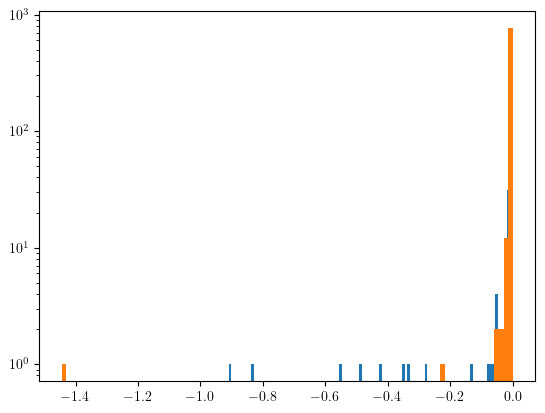

In [152]:
plt.hist(np.min(loglikelihoods.T-np.max(loglikelihoods,axis=1),axis=0), bins=100)
plt.hist(np.min(loglikelihoods_0d1.T-np.max(loglikelihoods_0d1,axis=1),axis=0), bins=100)
plt.yscale('log')
plt.show()

In [171]:
np.argmin(np.min(loglikelihoods_strain.T-np.max(loglikelihoods_strain,axis=1),axis=0))

345

In [30]:
log10As = np.random.uniform(-6, 1, size=100)
As = 10**log10As
weights = As *np.log(10)

In [31]:
eff = np.sum(weights)**2/np.sum(weights**2)/100

print(eff)

0.12470942274215131


(array([ 8.99554719,  6.34498672,  7.82786499, 16.43943675, 20.16687465,
         0.        , 10.04202198,  0.        , 12.69759392, 14.87174354]),
 array([1.04720030e-06, 6.45872558e-01, 1.29174407e+00, 1.93761558e+00,
        2.58348709e+00, 3.22935860e+00, 3.87523011e+00, 4.52110162e+00,
        5.16697313e+00, 5.81284464e+00, 6.45871616e+00]),
 <BarContainer object of 10 artists>)

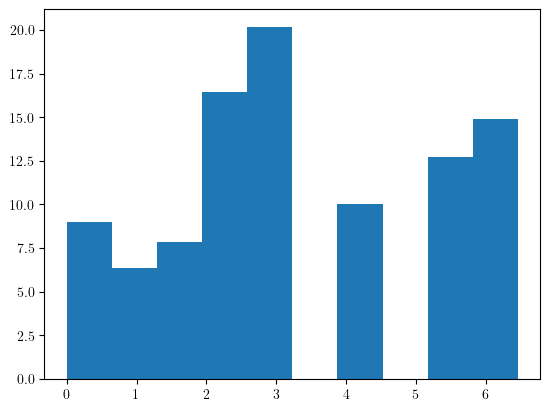

In [33]:
plt.hist(As, weights=weights)

In [126]:
with open('results_250620/result_CE_10995.json', "r") as f:
        result = json.load(f)

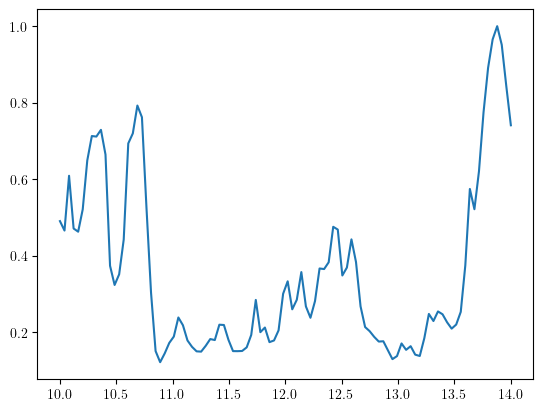

In [128]:
plt.plot(R1d6s, np.exp(result["logls_strain"]-np.max(result["logls_strain"])), label='Photon Counting')

In [110]:
result

{'logls': [-1.2749648408390568,
  -1.2779587939029229,
  -1.2821624556114992,
  -1.2866331070471242,
  -1.2905493396076655,
  -1.2934895457063034,
  -1.2954254903807554,
  -1.296551019071928,
  -1.2970994934219315,
  -1.2972338747569938,
  -1.2970167310758853,
  -1.296428998001494,
  -1.2954083569418975,
  -1.2938901760493295,
  -1.291843431912877,
  -1.28929906758736,
  -1.2863670266387537,
  -1.283231121354202,
  -1.2801316961699545,
  -1.277370371699194,
  -1.2753260284796082,
  -1.2744191629549793,
  -1.2749762422875572,
  -1.2770642104160221,
  -1.2803989968226661,
  -1.284411128541044,
  -1.2884442380562868,
  -1.291977739078555,
  -1.2947472414550338,
  -1.2967281747068857,
  -1.2980395003534455,
  -1.2988412394907471,
  -1.2992663230518469,
  -1.2993927376195575,
  -1.2992436019070648,
  -1.2988008326083156,
  -1.298023783283146,
  -1.2968684068955558,
  -1.2953042306685596,
  -1.2933286717269525,
  -1.290976126261437,
  -1.2883246839776303,
  -1.2854896293581461,
  -1.28261428

In [4]:

frequencies = np.sort(np.fft.fftfreq(2**13, d=1/1e4))

white_noise_time = np.random.randn(int(len(frequencies)))

white_noise_freq = interp1d(np.fft.fftfreq(len(frequencies), d=1/1e4), np.fft.fft(white_noise_time))(frequencies)

In [5]:
np.fft.fftfreq(len(frequencies), d=1/1e4).shape, np.fft.fft(white_noise_time).shape

((8192,), (8192,))

In [6]:
def generate_colored_noise(psd_data, frequencies):

    N = len(frequencies)
    T = 1/(frequencies[1] - frequencies[0])  # Assuming uniform frequency spacing
    amplitude = np.sqrt(0.5*T * psd_data) # NOTE THAT THE PSD IS ONE SIDED

    noise_real = np.random.normal(0, 1, N)
    noise_imag = np.random.normal(0, 1, N)
    noise_freq = amplitude * (noise_real + 1j * noise_imag)

    noise_freq[0] = noise_freq[0].real + 0j
    noise_freq[N//2] = noise_freq[N//2].real + 0j
    noise_freq[N//2+1:] = np.conj(noise_freq[1:N//2][::-1])

    return noise_freq#np.concatenate([noise_freq[N//2+1:], noise_freq[1:N//2]])

In [27]:
noise = generate_colored_noise(np.ones(len(frequencies)), frequencies)

/home/ethan.payne/.conda/envs/ve310/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


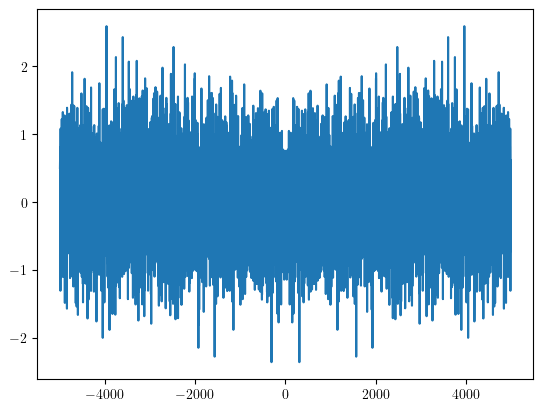

In [28]:
plt.plot(frequencies, noise)

In [4]:
frequencies = np.sort(np.fft.fftfreq(2**13, d=1/1e4))

detector_sqz = GWPhotonCounting.detector.Detector(
    frequencies, '/home/ethan.payne/projects/GWPhotonCounting/examples/data/CE_total_psd_sqz.csv', None, 
    gamma=100, random_seed=1632, N_frequency_spaces=10, N_time_spaces=10)

gaussian_likelihood = GWPhotonCounting.distributions.GaussianStrainLikelihood()

N_total_filters for Nyquist: 200
N_total_filters from user: 200


In [5]:
noise_realization = gaussian_likelihood.generate_realization(detector_sqz.total_psd, frequencies)

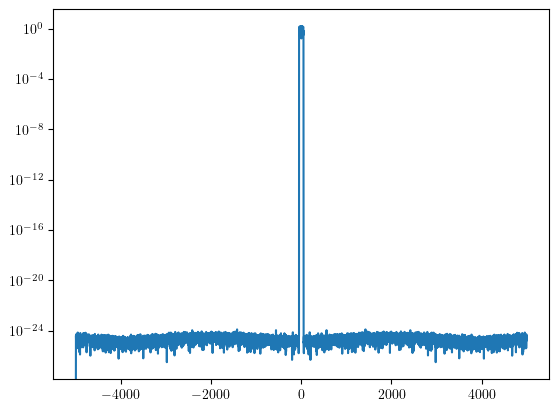

In [7]:
plt.semilogy(frequencies, np.abs(noise_realization))
#plt.semilogy(frequencies, detector_sqz.total_psd**0.5)


(1e-27, 1e-23)

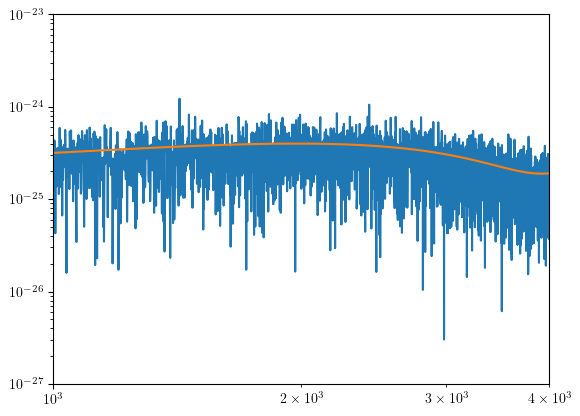

In [39]:
plt.loglog(frequencies, np.abs(noise_realization), label='Realization')
plt.loglog(frequencies, np.abs(detector_sqz.total_psd)**0.5, label='PSD')

plt.xlim(1000,4000)
plt.ylim(1e-27,1e-23)

In [26]:
np.sum(frequencies >= 0)

4096

In [23]:
frequencies

array([ 0.,  1.,  2., ..., -3., -2., -1.])

In [27]:
frequencies = np.fft.fftfreq(2**13, d=1/10**4)

In [40]:
2**13/10**4

0.8192

In [42]:
1/np.diff(frequencies)[0]

0.8192